<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_18_Forecasting_Cocacola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting using Model Based Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cocacola= pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


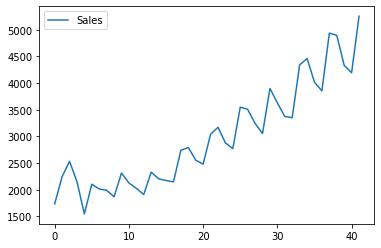

In [4]:
cocacola.plot()

In [6]:
quarter=['Q1','Q2','Q3','Q4']
n=cocacola['Quarter'][0]

In [16]:
n[0:2]

'Q1'

In [17]:
for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
dummy=pd.DataFrame(pd.get_dummies(cocacola['quarter']))

In [19]:
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [20]:
cocacola1=pd.concat((cocacola,dummy),axis=1)
t= np.arange(1,43)
cocacola1['t']=t
cocacola1['t_square']=cocacola1['t']*cocacola1['t']

In [21]:
log_Sales=np.log(cocacola1['Sales'])
cocacola1['log_Sales']=log_Sales

In [22]:
cocacola1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


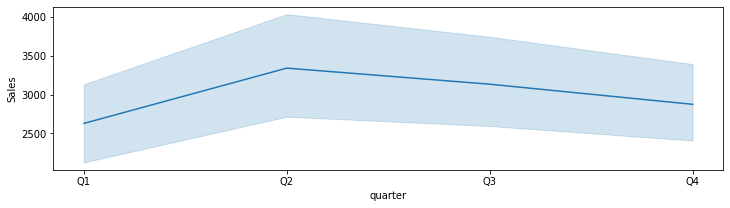

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=cocacola1)

In [26]:
train= cocacola1.head(34)
test=cocacola1.iloc[34:38,:]
cocacola2= cocacola1.head(38)
predict_data = cocacola1.tail(4)

In [27]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
#linear model
linear= smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt((np.mean(np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

534.3773603805078

In [33]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

394.67472775414996

In [34]:
#exponential model
exp=smf.ols('log_Sales~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

564.5012993862682

In [36]:
#additive seasonality
add_sea= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.7389646362883

In [40]:
#additive seasonality with linear trend
add_linear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_linear=pd.Series(add_linear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmse_add_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_linear))**2))
rmse_add_linear

572.931582801424

In [38]:
#additive seasonality with quadratic trend
add_quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_quad=pd.Series(add_quad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

174.88610047128964

In [41]:
#multiplicative seasonality
mul_sea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_sea= pd.Series(mul_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_mul_sea= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1757.7740414202278

In [42]:
#multiplicative seasonality with linear trend
mul_lin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_lin= pd.Series(mul_lin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_lin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_lin)))**2))
rmse_mul_lin

404.56422621599

In [43]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

291.71382207485834

In [48]:
#tabulating the rmse values

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_linear","rmse_add_quad","rmse_mul_sea","rmse_mul_lin","rmse_mul_quad"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_linear,rmse_add_quad,rmse_mul_sea,rmse_mul_lin,rmse_mul_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_add_quad,174.886100
8,rmse_mul_quad,291.713822
2,rmse_quad,394.674728
7,rmse_mul_lin,404.564226
0,rmse_linear,534.377360
1,rmse_exp,564.501299
4,rmse_add_linear,572.931583
3,rmse_add_sea,1686.738965
6,rmse_mul_sea,1757.774041


Predict for new time period

In [53]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [54]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=cocacola2).fit()

In [55]:
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

38    4852.677797
39    4709.186074
40    4638.364982
41    5406.022652
dtype: float64

In [56]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970,4852.677797
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015,4709.186074
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410,4638.364982
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555,5406.022652


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Forecasting using Data Driven Models

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [60]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

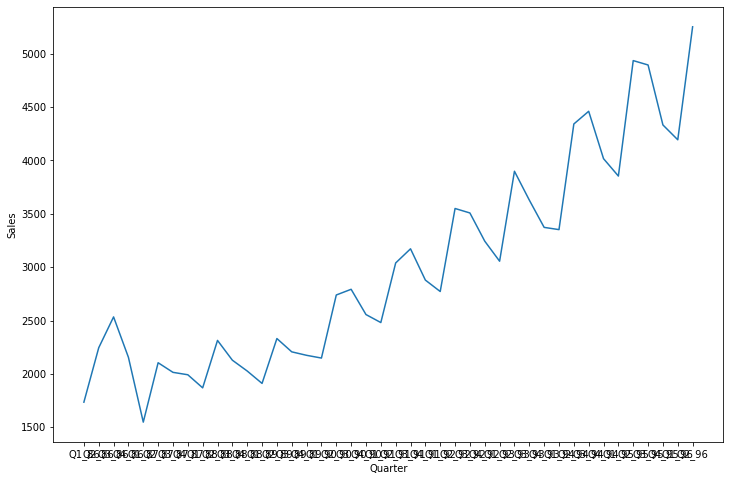

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Quarter",y="Sales",data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6801dc550>]],
      dtype=object)

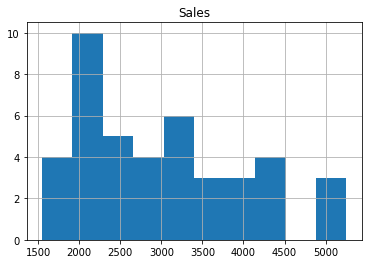

In [63]:
data.hist()

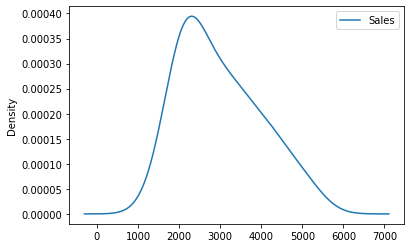

In [64]:
data.plot(kind='kde')

Moving Average

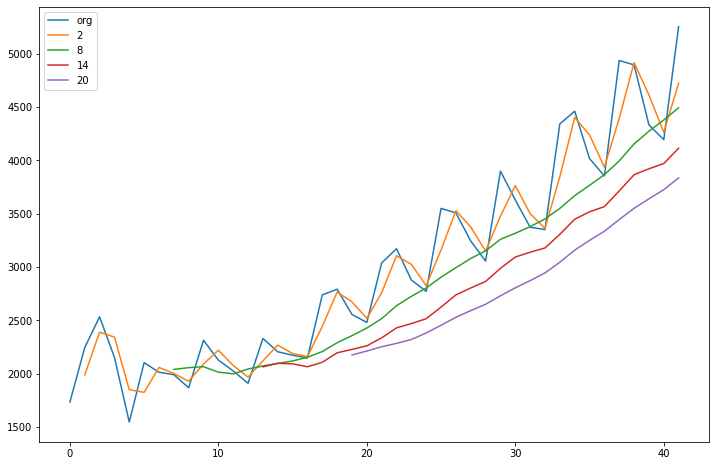

In [66]:
plt.figure(figsize=(12,8))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot

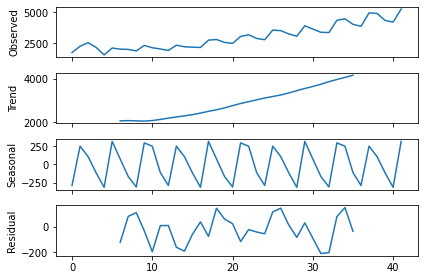

In [68]:
decompose_ts_add = seasonal_decompose(data.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

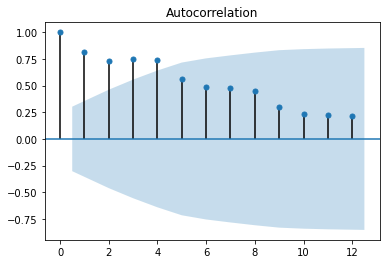

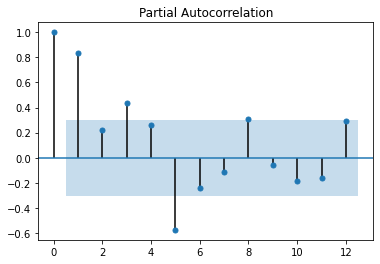

In [69]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [70]:
train1 = data.head(30)
test1 = data.tail(12)

Evaluation Metric MAPE

In [71]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [73]:
ses_model = SimpleExpSmoothing(train1["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_ses,test1.Sales) 

22.046762589354106

Holt method

In [74]:
hw_model = Holt(train1["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_hw,test1.Sales) 

11.213843719841732

Holts winter exponential smoothing with additive seasonality and additive trend¶

In [75]:
hwe_model_add_add = ExponentialSmoothing(train1["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_hwe_add_add,test1.Sales) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.697454705979935

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [76]:
hwe_model_mul_add = ExponentialSmoothing(train1["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_hwe_mul_add,test1.Sales) 

7.599339261653124

Final Model by combining train and test

In [77]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Forecasting next 10

In [79]:
hwe_model_mul_add.forecast(10)

42    4923.825834
43    4585.806901
44    4530.662095
45    5759.370929
46    5819.152426
47    5203.721006
48    4956.155622
49    6256.502400
50    6107.476878
51    5463.902671
dtype: float64